<h1>Data Mining Project</h1>

This project aims at applying data mining techniques to the dataset <b>‘CAR’</b>.
To apply data mining techniques on <b>'CAR'</b> dataset we need to install some necessary libraries

In [1]:
# Install necessary libraries

# !pip install spmf
# !pip install mlxtend
# !pip install pyECLAT

As <b>Pandas</b> provides easy-to-use functions to load data from various file formats such as CSV, Excel, SQL databases, etc. in our case, we need to load the 'CAR' dataset from a CSV file into a pandas DataFrame.

In [2]:
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv("car.data")
df.columns = ['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety', 'class']

print(df.shape)
print(df.columns)

(1727, 7)
Index(['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety',
       'class'],
      dtype='object')


<h1>Data Preprocessing</h1>

In [4]:
# Check dataset for missing value

before = df.shape[0]
df = df.dropna()
after = df.shape[0]
print("We have", before - after, "missing value in the dataset")

We have 0 missing value in the dataset


In [5]:
mapping = []
for column in df.columns:
    uniq = df[column].unique()
    start = len(mapping)
    for index,u in enumerate(uniq):
        mapping.append([column,u,start + index])
    

# for all columns replace all cell values with integers from mapping

# Create a dictionary to facilitate the mapping
mapping_dict = {(item[0], item[1]): item[2] for item in mapping}

# Replace values in the DataFrame according to the mapping array
for column in df.columns:
    df[column] = df[column].map(lambda x: mapping_dict[(column, x)])

print(df)


      buying  maintenance  doors  persons  lug_boot  safety  class
0          0            4      8       12        15      18     21
1          0            4      8       12        15      19     21
2          0            4      8       12        16      20     21
3          0            4      8       12        16      18     21
4          0            4      8       12        16      19     21
...      ...          ...    ...      ...       ...     ...    ...
1722       3            7     11       14        16      18     24
1723       3            7     11       14        16      19     23
1724       3            7     11       14        17      20     21
1725       3            7     11       14        17      18     24
1726       3            7     11       14        17      19     23

[1727 rows x 7 columns]


<h1>Class Imbalance</h1>

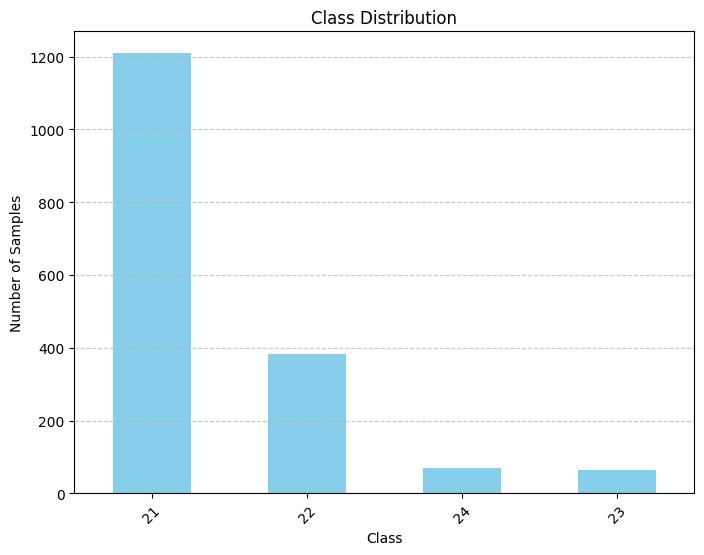

In [6]:
import matplotlib.pyplot as plt

# Count the number of samples for each class
class_counts = df['class'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


To avoid imbalancing we use undersampling technique

In [7]:
from imblearn.under_sampling import RandomUnderSampler

# Define the features (X) and target variable (y)
X = df.drop(columns=['class'])
y = df['class']

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Check the class distribution after undersampling
print("Class distribution after undersampling:")
print(y_resampled.value_counts())


Class distribution after undersampling:
21    65
22    65
23    65
24    65
Name: class, dtype: int64


In [8]:
X_resampled.values

array([[ 0,  4, 11, 14, 16, 20],
       [ 1,  4, 10, 14, 15, 18],
       [ 0,  7,  9, 12, 15, 19],
       ...,
       [ 3,  6,  9, 14, 15, 19],
       [ 2,  7,  9, 14, 16, 18],
       [ 3,  6, 11, 13, 16, 18]], dtype=int64)

To compare algorithms from three different paradigms, we choose:
<ul>
    <li><h6>Apriori:</h6> Level-based algorithm</li>
    <li><h6>FP-Growth:</h6> Depth-based algorithm</li>
    <li><h6>Eclat:</h6> Vertical data format-based algorithm</li>
</ul>

As SPMF did not give expected results for algorithms, we use <b>mlxtend</b> library for Apriori and FP-Growth

In [9]:
spmf_bin_location_dir = "C:\\Users\\rvani\\Downloads"

import os
from spmf import Spmf

# Convert DataFrame into a string format representing sequences
sequences_str = "\n".join(" ".join(map(str, row)) for row in X_resampled.values)

# Create a temporary file to store the input data
with open("input.txt", "w") as f:
    f.write(sequences_str)


# Set the minimum support threshold (adjust as needed)
min_support = 0.3

# Convert min_support to double value
min_support_double = float(min_support)

# Run Apriori algorithm using SPMF
spmf_instance = Spmf(algorithm_name="Apriori", input_filename="input.txt", output_filename="output_apriori.txt", spmf_bin_location_dir=spmf_bin_location_dir, arguments=[f"{min_support_double}"])
spmf_instance.run()

# Parse the output file to obtain frequent itemsets
frequent_itemsets = []
with open("output_apriori.txt", "r") as f:
    for line in f:
        frequent_itemsets.append(line.strip())

# Remove temporary files
os.remove("input.txt")


>/C:/Users/rvani/Downloads/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 55
 The algorithm stopped at size 2
 Frequent itemsets count : 10
 Maximum memory usage : 8.442001342773438 mb
 Total time ~ 0 ms



In [10]:
# Convert DataFrame into a string format representing sequences
sequences_str = "\n".join(" ".join(map(str, row)) for row in X_resampled.values)

# Create a temporary file to store the input data
with open("input.txt", "w") as f:
    f.write(sequences_str)

# Set the minimum support threshold (adjust as needed)
min_support = 0.3

# Convert min_support to double value
min_support_double = float(min_support)

# Run FP-Growth algorithm using SPMF
spmf_instance = Spmf(algorithm_name="FPGrowth_itemsets", input_filename="input.txt", output_filename="output_FPGrowth_itemsets.txt", spmf_bin_location_dir=spmf_bin_location_dir, arguments=[f"{min_support_double}"])
spmf_instance.run()

# Parse the output file to obtain frequent itemsets
frequent_itemsets_fp = []
with open("output_FPGrowth_itemsets.txt", "r") as f:
    for line in f:
        frequent_itemsets_fp.append(line.strip())


# Remove temporary files
os.remove("input.txt")


>/C:/Users/rvani/Downloads/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 260
 Max memory usage: 8.882110595703125 mb 
 Frequent itemsets count : 10
 Total time ~ 16 ms



In [11]:
# Convert DataFrame into a string format representing sequences
sequences_str = "\n".join(" ".join(map(str, row)) for row in X_resampled.values)

with open("input.txt", "w") as f:
    f.write(sequences_str)


# Set the minimum support threshold (adjust as needed)
min_support = 0.3

# Convert min_support to double value
min_support_double = float(min_support)

# Run Apriori algorithm using SPMF
spmf_instance = Spmf(algorithm_name="Eclat", input_filename="temp_input.txt", output_filename="output_eclat.txt", spmf_bin_location_dir=spmf_bin_location_dir, arguments=[f"{min_support_double}"])
spmf_instance.run()

# Parse the output file to obtain frequent itemsets
frequent_itemsets_eclat = []
with open("output_eclat.txt", "r") as f:
    for line in f:
        frequent_itemsets.append(line.strip())


>/C:/Users/rvani/Downloads/spmf.jar
=============  ECLAT v0.96r18 - STATS =============
 Transactions count from database : 260
 Frequent itemsets count : 10
 Total time ~ 0 ms
 Maximum memory usage : 8.442085266113281 mb



<h1>Classification</h1>

In [12]:
original_data = pd.read_csv('car.data')
association_rules = pd.read_csv('Apriori_Rules.txt')

In [13]:
# Read association rules from the text file
with open('Apriori_Rules.txt', 'r') as file:
    association_rules = file.readlines()

# Initialize binary features dictionary
binary_features = {}

# Parse simplified association rules and generate binary features
for rule in association_rules:
    # Extract conditions from the rule
    condition1, condition2 = rule.strip().split(' ==> ')
    attribute1, value1 = condition1.split(' ')[0], condition1.split(' ')[-1]
    attribute2, value2 = condition2.split(' ')[0], condition2.split(' ')[-1]
    
    # Generate binary features based on conditions
    binary_feature_name1 = f"{attribute1}_{value1}"
    binary_feature_name2 = f"{attribute2}_{value2}"
    
    # Ensure binary feature names are unique
    if binary_feature_name1 not in binary_features:
        binary_features[binary_feature_name1] = [0] * len(association_rules)  # Initialize binary feature list
    if binary_feature_name2 not in binary_features:
        binary_features[binary_feature_name2] = [0] * len(association_rules)  # Initialize binary feature list
    
    # Set binary feature to 1 for the corresponding rule
    binary_features[binary_feature_name1][association_rules.index(rule)] = 1
    binary_features[binary_feature_name2][association_rules.index(rule)] = 1

# Convert binary features dictionary to DataFrame
binary_features_df = pd.DataFrame(binary_features)
print(binary_features_df)

    13_13  3_0.4778761061946903  3_3  13_0.4909090909090909  19_19  \
0       1                     1    0                      0      0   
1       0                     0    1                      1      0   
2       0                     0    0                      0      1   
3       0                     0    1                      0      0   
4       0                     0    0                      0      1   
5       0                     0    0                      0      0   
6       0                     0    0                      0      1   
7       1                     0    0                      0      0   
8       0                     0    0                      0      0   
9       0                     0    0                      0      0   
10      0                     0    0                      0      1   
11      0                     0    0                      0      0   
12      0                     0    0                      0      1   
13      0           

In [14]:
from sklearn.cluster import KMeans

# Assuming binary_features_df is your DataFrame containing binary features
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(binary_features_df)

# Print cluster labels
print("Cluster Labels:")
print(clusters)

Cluster Labels:
[0 2 1 2 1 0 1 0 0 0 1 0 1 0]


C:\Users\rvani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame named 'original_data' containing your original dataset
original_dataset = pd.read_csv("car.data")
# Select features and target variable
original_dataset.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

# One-hot encode 'doors' column
original_dataset = pd.get_dummies(original_dataset, columns=['doors'], drop_first=True)

# Apply LabelEncoder to other categorical columns
categorical_cols = ["buying", "maint", "persons", "lug_boot", "safety", "class"]
for col in categorical_cols:
    original_dataset[col] = original_dataset[col].astype('category').cat.codes

# and a DataFrame named 'association_rules' containing the association rules



In [16]:
X = original_dataset.drop(columns=["class"])
y = original_dataset["class"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9421965317919075
